Import libraries to begin the data analysis process

In [1]:
%pip install -r "C:\Users\Acer\Desktop\Projects\Consumer Complaint Analysis (AIOPS PROJECT)\requirements.txt"

Obtaining file:///C:/Users/Acer/Desktop/Projects/Consumer%20Complaint%20Analysis%20%28AIOPS%20PROJECT%29/notebook (from -r C:\Users\Acer\Desktop\Projects\Consumer Complaint Analysis (AIOPS PROJECT)\requirements.txt (line 9))Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/Acer/Desktop/Projects/Consumer%20Complaint%20Analysis%20%28AIOPS%20PROJECT%29/notebook (from -r C:\Users\Acer\Desktop\Projects\Consumer Complaint Analysis (AIOPS PROJECT)\requirements.txt (line 9)) does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Importing data**

In [4]:
zip_file_path = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

In [5]:
df = pd.read_csv(zip_file_path)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9760\2561993390.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path)


In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76449,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444271
1,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76543,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444281
2,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90247,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444295
3,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32605,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444296
4,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Difficulty submitting a dispute or getting inf...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90222,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444316


**Data Analysis**

In [7]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4786774 entries, 0 to 4786773
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 657.

In [9]:
df.shape

(4786774, 18)

In [10]:
df['Consumer consent provided?']

0                           NaN
1                           NaN
2                           NaN
3                           NaN
4                           NaN
                   ...         
4786769                   Other
4786770                     NaN
4786771                   Other
4786772    Consent not provided
4786773    Consent not provided
Name: Consumer consent provided?, Length: 4786774, dtype: object

In [11]:
df[df['Consumer disputed?'] == 'Yes'].shape[0]

148378

In [12]:
nan_values = df[df['Consumer consent provided?'].isna()]
nan_values

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76449,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444271
1,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76543,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444281
2,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90247,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444295
3,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32605,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444296
4,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Difficulty submitting a dispute or getting inf...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90222,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786754,2022-03-10,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,KEYCORP,PA,19464,NaN,NaN,Postal mail,2022-03-10,Closed with explanation,Yes,NaN,5308965
4786757,2022-03-11,Checking or savings account,Other banking product or service,Managing an account,Banking errors,NaN,NaN,JPMORGAN CHASE & CO.,CA,91201,NaN,NaN,Phone,2022-03-11,Closed with explanation,Yes,NaN,5318315
4786763,2023-08-09,"Payday loan, title loan, or personal loan",Payday loan,Struggling to pay your loan,NaN,NaN,NaN,CCF Intermediate Holdings LLC,AZ,85233,Older American,NaN,Phone,2023-08-09,Closed with explanation,Yes,NaN,7376851
4786768,2023-07-31,"Money transfer, virtual currency, or money ser...",Money order,Lost or stolen money order,NaN,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,TX,78232,NaN,NaN,Phone,2023-08-10,Closed with explanation,Yes,NaN,7328868


In [13]:
# Count the occurrences of each category
issue_counts = df['Issue'].value_counts()
issue_counts

Issue
Incorrect information on your report                                                1355034
Improper use of your report                                                          701717
Problem with a credit reporting company's investigation into an existing problem     589338
Attempts to collect debt not owed                                                    199359
Problem with a company's investigation into an existing problem                      136753
                                                                                     ...   
Problem with an overdraft                                                                 9
Lender damaged or destroyed vehicle                                                       8
Property was damaged or destroyed property                                                7
Lender sold the property                                                                  7
Lender damaged or destroyed property                                      

In [14]:
product_counts = df['Product'].value_counts()

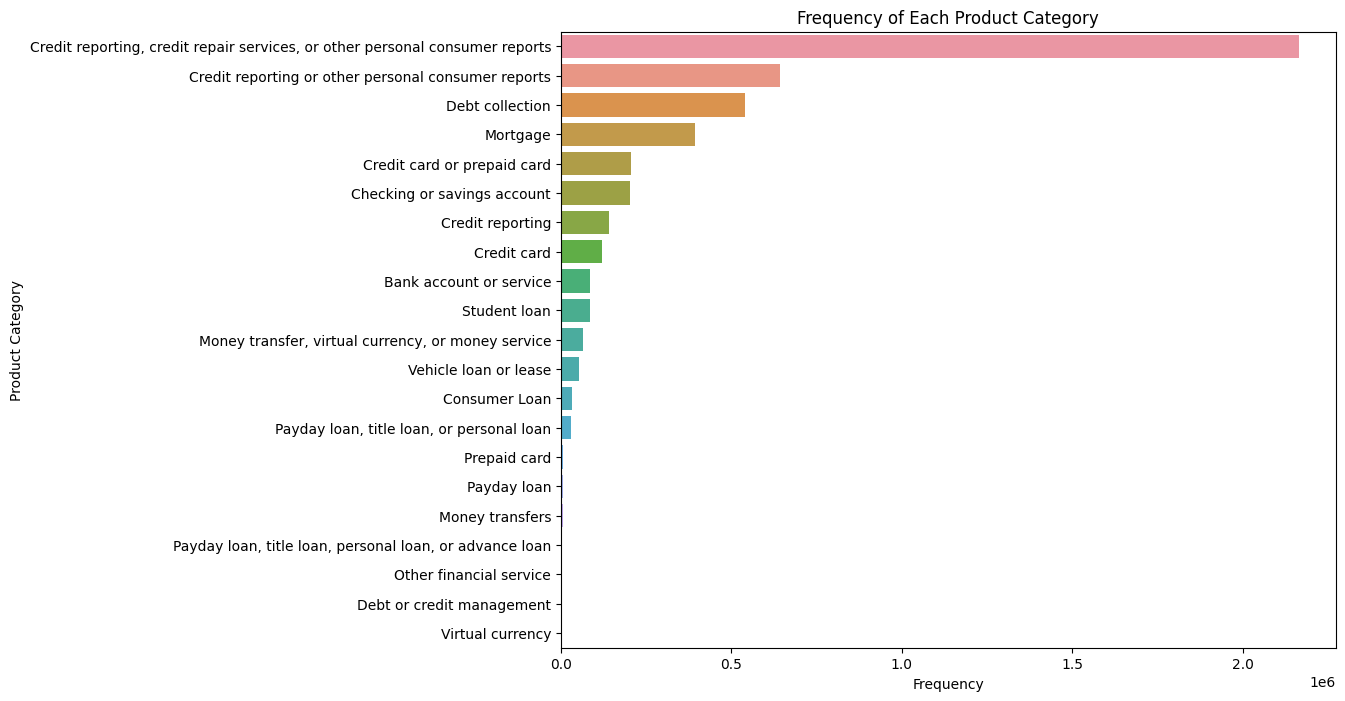

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x=product_counts.values, y=product_counts.index, orient='h')
plt.title('Frequency of Each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

In [16]:
company_response = df['Company response to consumer'].value_counts()

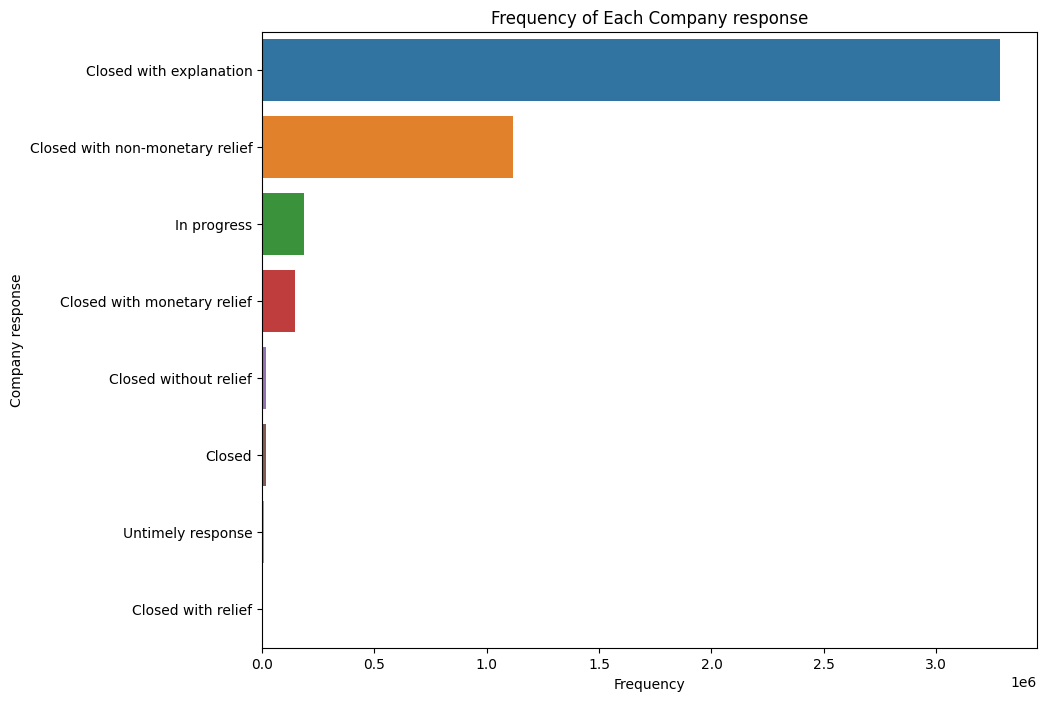

In [17]:
plt.figure(figsize=(10, 8))
sns.barplot(x=company_response.values, y=company_response.index, orient='h')
plt.title('Frequency of Each Company response')
plt.xlabel('Frequency')
plt.ylabel('Company response')
plt.show()

In [18]:
consumer_disputed = df['Consumer disputed?'].value_counts()

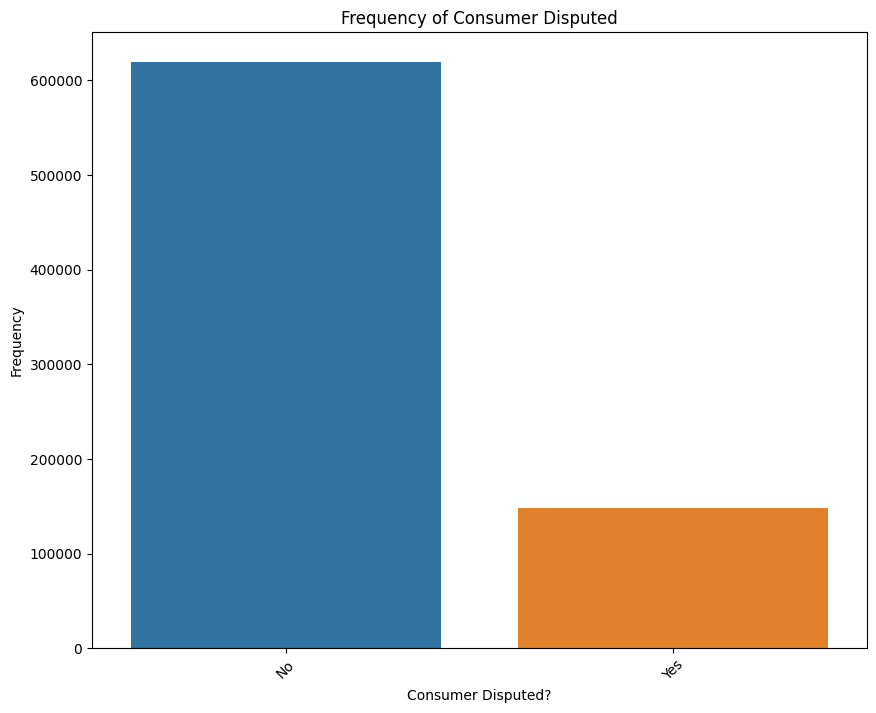

In [23]:
plt.figure(figsize=(10, 8))
# Assuming consumer_disputed is a Series with indices as categories and values as counts
sns.barplot(x=consumer_disputed.index, y=consumer_disputed.values)
plt.title('Frequency of Consumer Disputed')
plt.ylabel('Frequency')  # Correcting label for clarity
plt.xlabel('Consumer Disputed?')  # Adjusting label for clarity
plt.xticks(rotation=45)  # Optional: Rotate labels if they overlap
plt.show()

In [24]:
# Convert 'Consumer disputed?' to numerical format: 1 for 'Yes' and 0 for 'No'
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})

# Example for 'Timely response?'
df['Timely response?'] = df['Timely response?'].map({'Yes': 1, 'No': 0})


In [25]:
# Convert dates to datetime objects
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# Calculate response time in days
df['Response time (days)'] = (df['Date sent to company'] - df['Date received']).dt.days


Text(0.5, 1.0, 'Correlation Matrix')

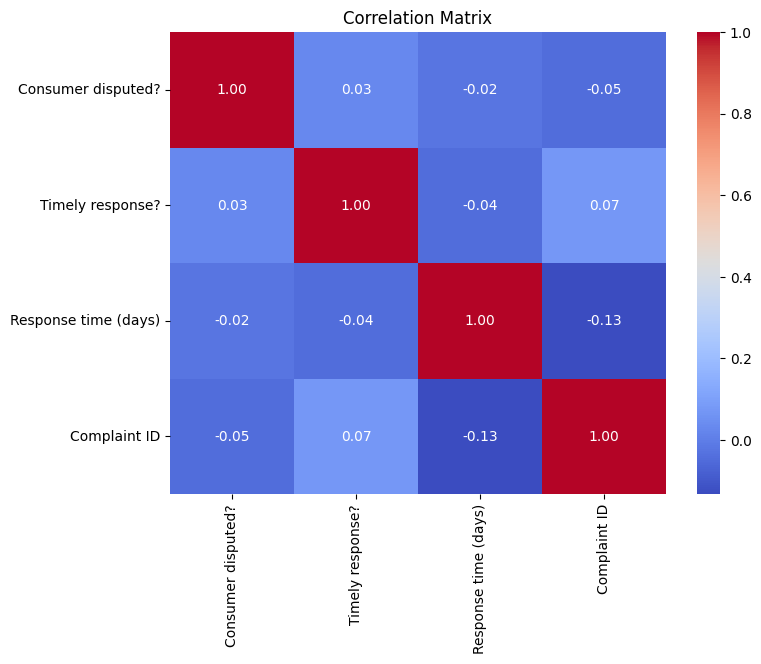

In [26]:
# Assuming 'Consumer disputed?' and 'Timely response?' are now numerical
correlation_matrix = df[['Consumer disputed?', 'Timely response?', 'Response time (days)', 'Complaint ID']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')

**Impute missing values with 'Unknown' or the most common value**

In [27]:
missing_data = df.isnull().sum()

In [28]:
missing_data

Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        729048
Consumer complaint narrative    3079055
Company public response         2520404
Company                               0
State                             44533
ZIP code                          30224
Tags                            4321622
Consumer consent provided?       973317
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              4018458
Complaint ID                          0
Response time (days)                  0
dtype: int64

In [29]:
num_features = ['Response time (days)']
cat_features = df.select_dtypes(include=['object']).columns.tolist()  # Ensure 'Consumer disputed?' is not included if it's your target
text_features = ['Consumer complaint narrative']

In [30]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = imputer.fit_transform(df[cat_features])

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('text', TfidfVectorizer(max_features=1000, stop_words='english'), [text_features])
    ], remainder='passthrough'
)

In [38]:
# Advanced Feature Engineering
# Extract year, month from 'Date received', and calculate 'Complaint length' and 'Response Time'
df['Year received'] = df['Date received'].dt.year
df['Month received'] = df['Date received'].dt.month
df['Complaint length'] = df['Consumer complaint narrative'].apply(len)
df['Response Time'] = (df['Date sent to company'] - df['Date received']).dt.days

In [40]:
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [41]:
features = list(set(features))

In [43]:
features = list(dict.fromkeys(features))
print(features)

['Product', 'Month received', 'Year received', 'Consumer complaint narrative', 'State', 'Consumer consent provided?', 'Sub-issue', 'Company response to consumer', 'Issue', 'Response time (days)', 'Company public response', 'Sub-product', 'Company', 'Submitted via', 'Response Time', 'Complaint length', 'Tags', 'ZIP code']


In [44]:
missing_features = [f for f in features if f not in df.columns]
print("Missing features:", missing_features)

Missing features: []


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Separating features by data type
numerical_features = ['Month received', 'Year received', 'Response time (days)', 'Response Time', 'Complaint length']
categorical_features = ['Product', 'State', 'Consumer consent provided?', 'Sub-issue', 'Company response to consumer', 'Issue', 'Company public response', 'Sub-product', 'Company', 'Submitted via', 'Tags', 'ZIP code']
text_features = ['Consumer complaint narrative']

# Building ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(stop_words='english'), text_features)
    ]
)


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_features = ['Response time (days)', 'Year received', 'Month received', 'Complaint length', 'Response Time']
cat_features = ['Product', 'State', 'Sub-issue', 'Company response to consumer', 'Issue', 'Company public response', 'Sub-product', 'Company', 'Submitted via', 'Tags', 'ZIP code']
text_features = ['Consumer complaint narrative']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('text', TfidfVectorizer(stop_words='english'), text_features)
    ]
)


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  # Corrected import
from sklearn.pipeline import Pipeline


# Define feature groups
num_features = ['Response time (days)', 'Year received', 'Month received', 'Complaint length', 'Response Time']
cat_features = ['Product', 'State', 'Sub-issue', 'Company response to consumer', 'Issue', 'Company public response', 'Sub-product', 'Company', 'Submitted via', 'Tags', 'ZIP code']
text_feature = 'Consumer complaint narrative'  # Assuming a single text column for simplicity

# Define transformers for each feature group
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english', max_features=1000)

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ('text', text_transformer, [text_feature])  # Ensure text features are passed as a list
    ]
)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Example preprocessing for numerical features
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Example preprocessing for categorical features
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])